In [12]:
from myplotlib.plot_scale_vs_data import plot_scale_vs_data
import numpy as np
import pickle

In [13]:
dir_list = np.loadtxt("../directory_list.txt", dtype = "str")
for idx in range(1, len(dir_list)):
    print("{0}. {1}".format(idx, dir_list[idx]))
    
dir_idx = int(input("select a directory index>> "))
with open("../" + dir_list[dir_idx] + "interpolate.pickle", mode = "rb") as f:
    interp = pickle.load(f)

1. results/2in_3out/x_vx_Mvir_to_x_10layers_100neurons_BatchNorm_RE_1e-3lr_1000Epoch_Standardization_After_acc_trainMvir1e+8_testMvir1e+7_1/


In [14]:
predicted_parameters    = list(interp.keys())
methods                 = list(interp[predicted_parameters[0]].keys())
print("predicted parameter : {0}".format(predicted_parameters))
print("interpolate methods : {0}".format(methods))

predicted parameter : ['x']
interpolate methods : ['origin', 'ScaleFactor', 'model', 'linear', 'cubic', 'hermite']


In [15]:
threshold   = 0.03  ## THRESHOLD(mylib/learning_parameter.py)
p_key       = "x"   ## choose one from predicted_parameter

origin      = interp[p_key]["origin"]
scalefactor = interp[p_key]["ScaleFactor"]
model       = interp[p_key]["model"]
halo_list   = []
for h in range(len(origin)):
    mask = origin[h] == model[h]
    input_data = np.abs(origin[h][mask])
    if np.any(input_data <= threshold): continue
    else:                               halo_list.append(h)

print("sub-halo num is {hnum}.".format(hnum=len(halo_list)))

sub-halo num is 279.


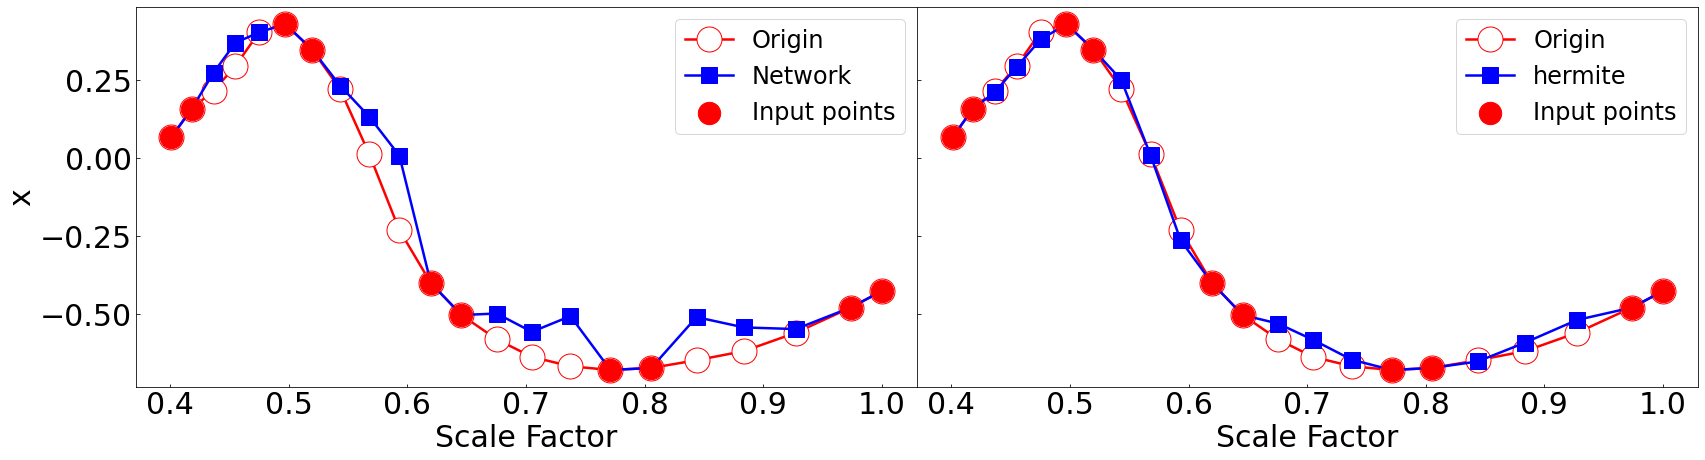

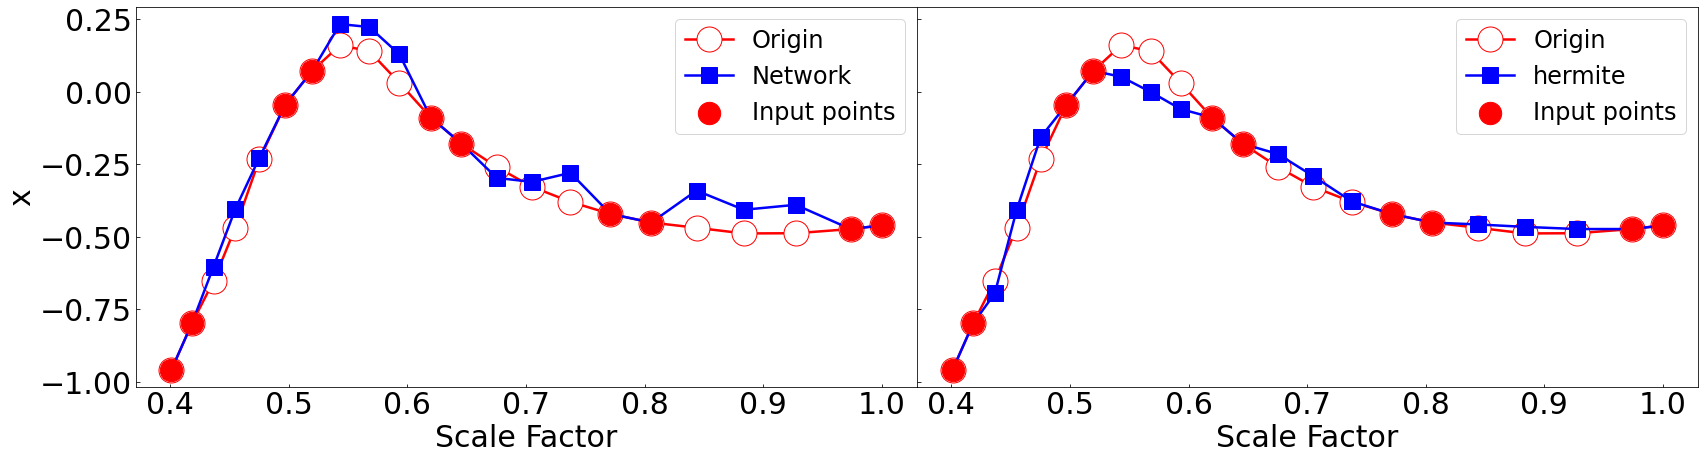

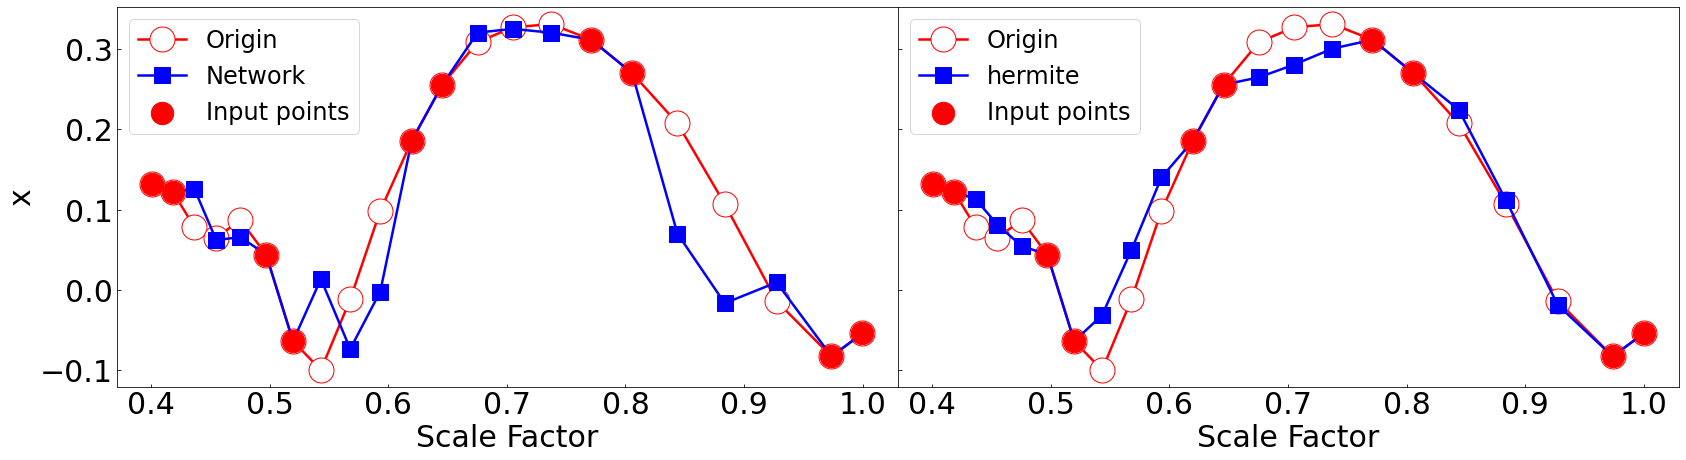

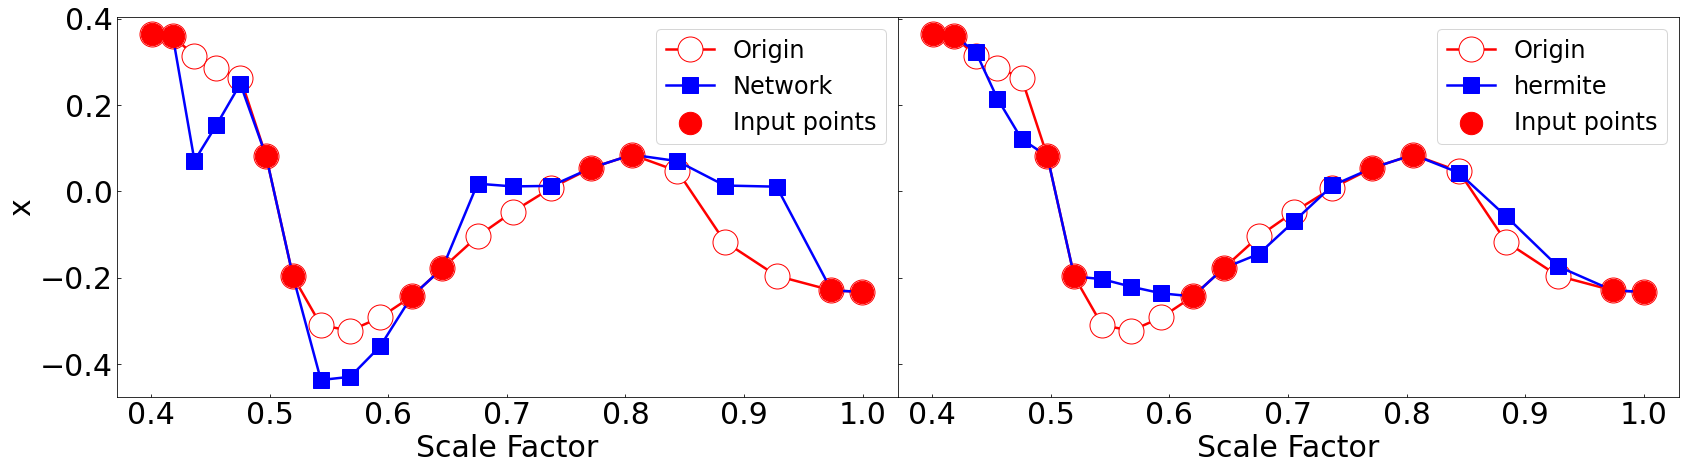

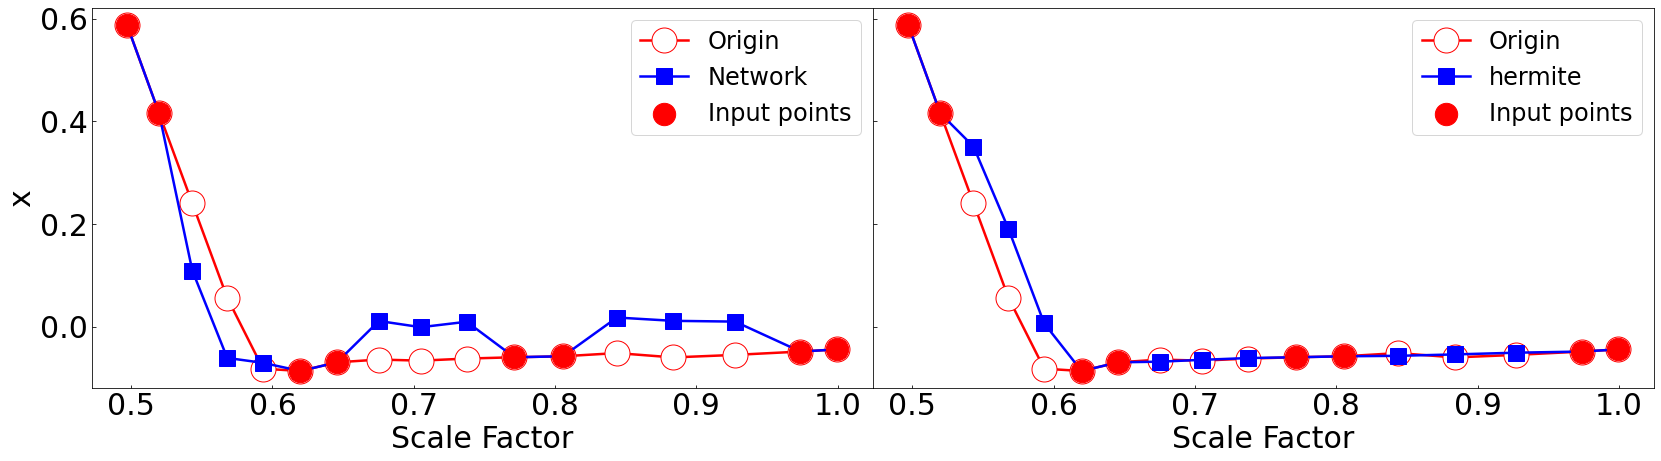

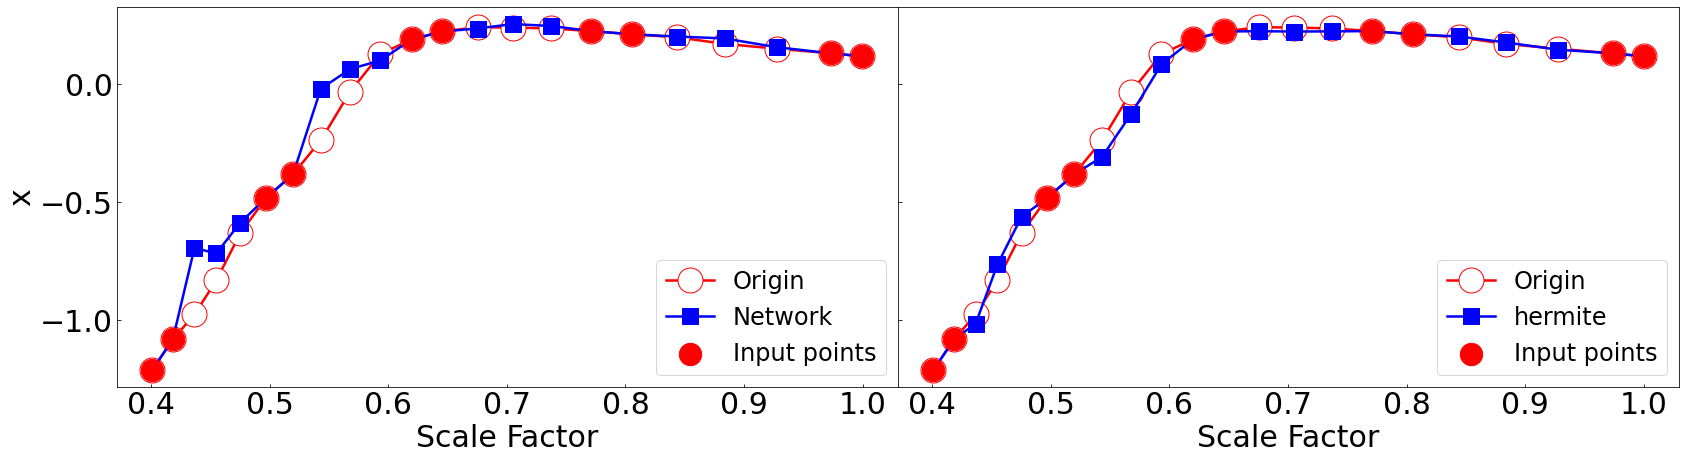

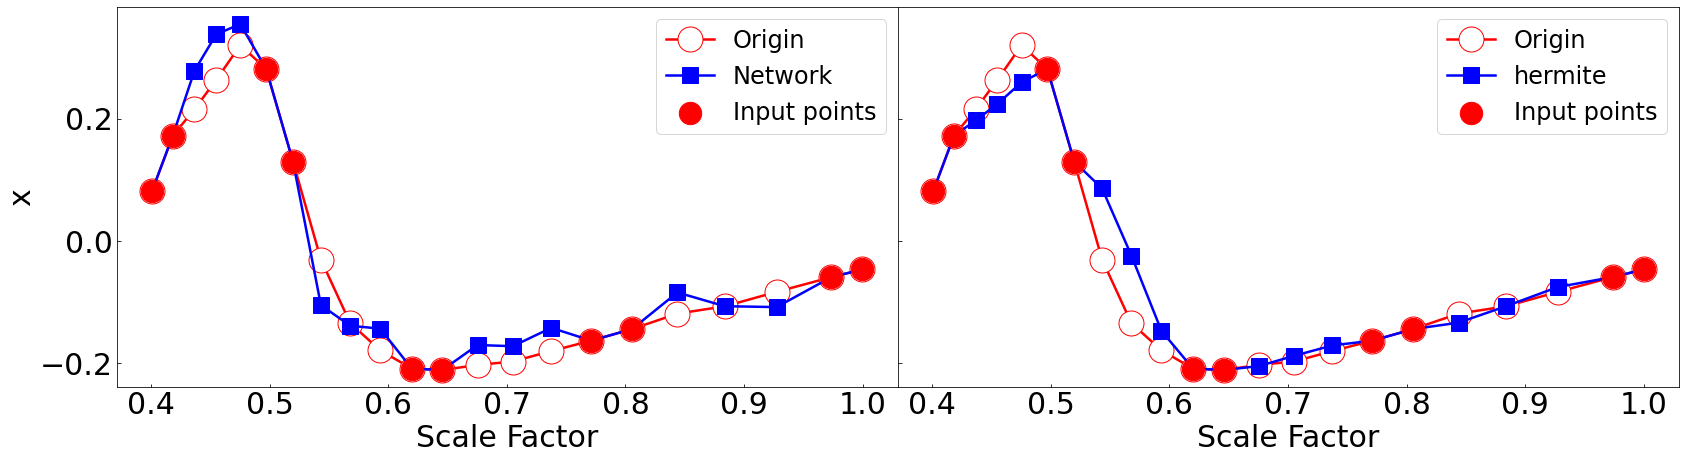

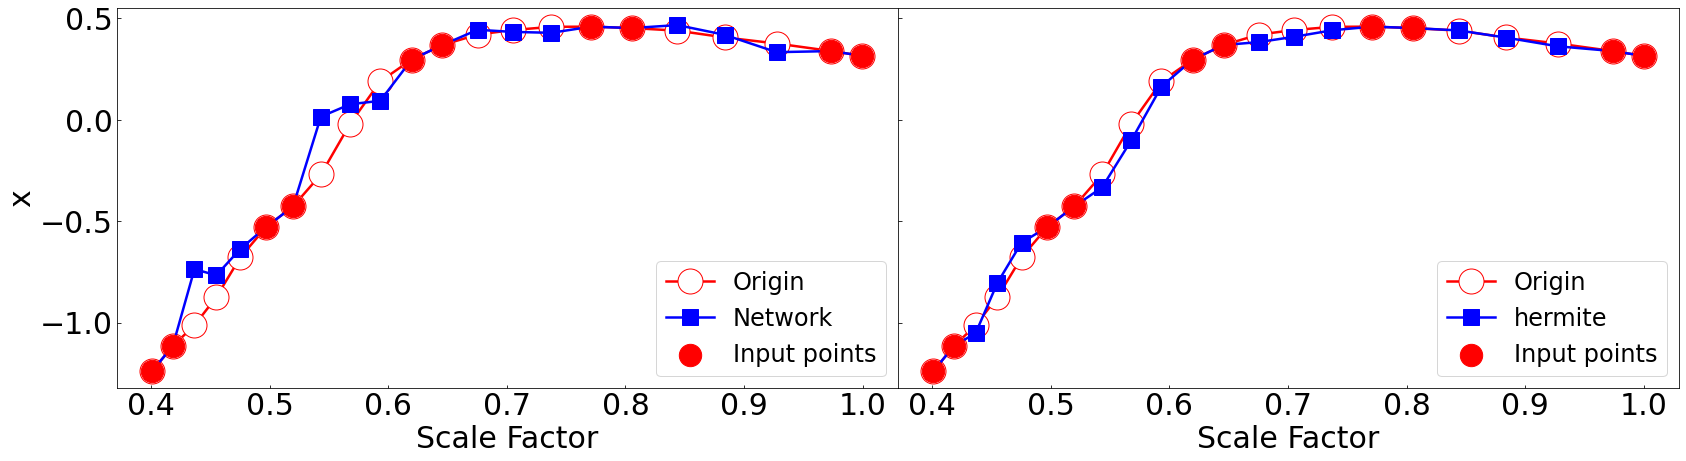

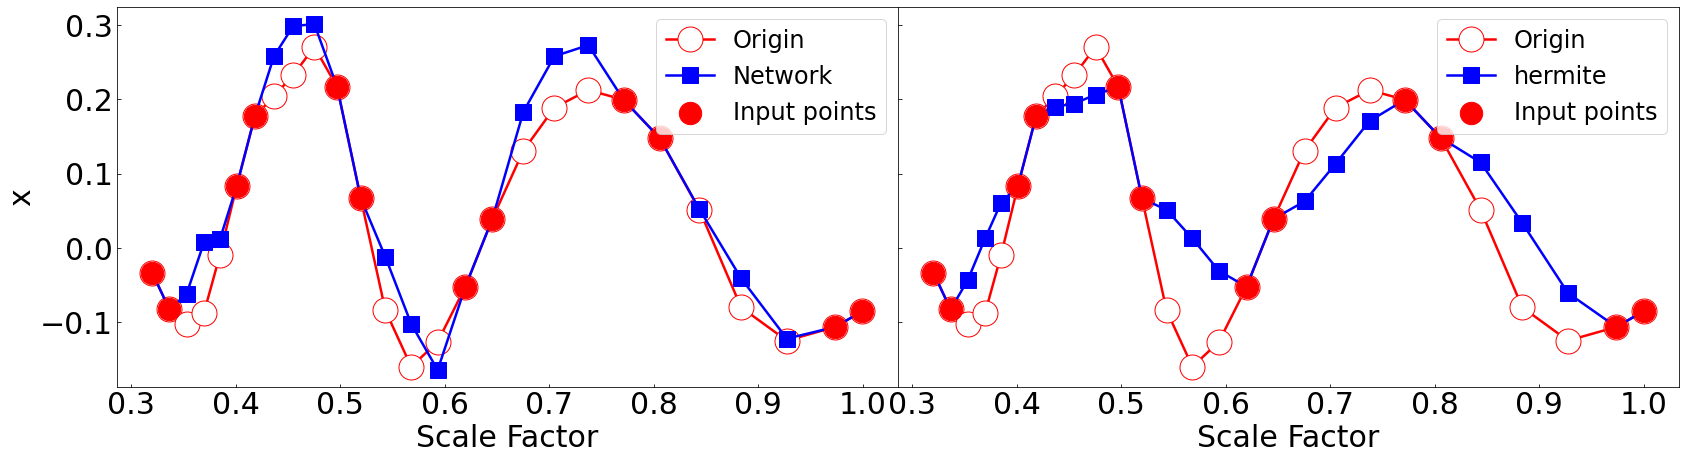

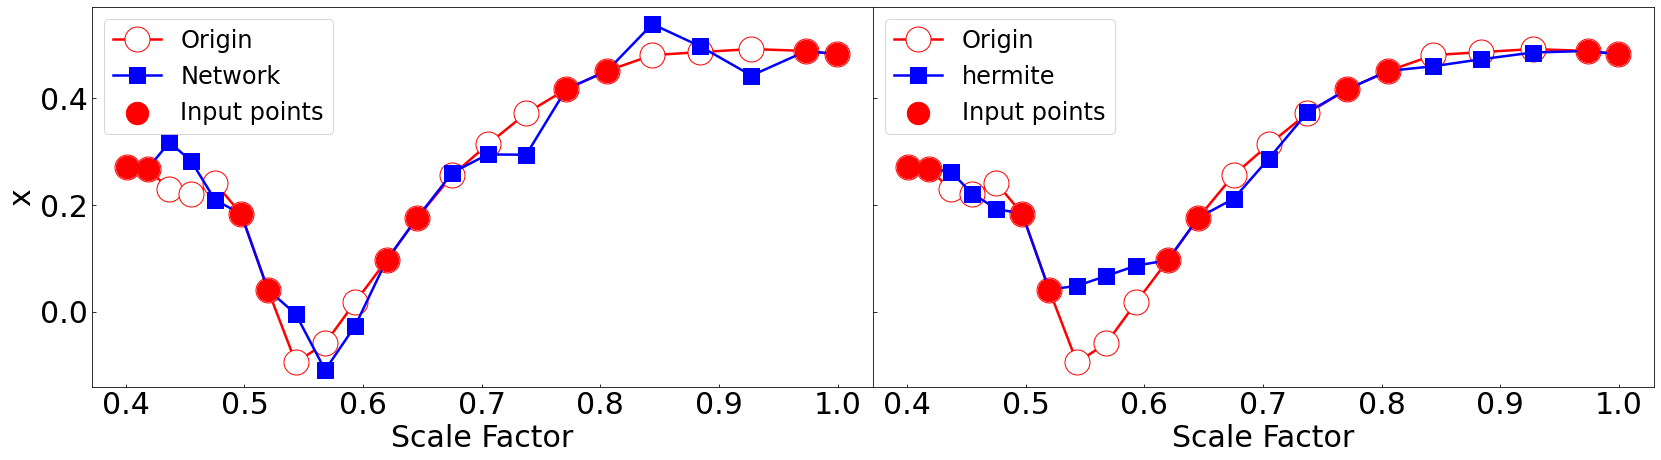

In [16]:
plot_h      = np.arange(10) ## indices of sub-halo to plot(iterable object like list)
method_key  = "hermite"     ## "linear" or "cubic" or "spline" or "hermite"

##### CONSTANT #####
loc         = "best"

for _h in plot_h:
    h           = halo_list[_h]
    method      = interp[p_key][method_key]
    plot_scale_vs_data(origin=origin[h], model=model[h], scalefactor=scalefactor[h], method=method[h], p_key=p_key, method_key=method_key,
                       figsize=(28,7), loc=loc,
                       fontsize=30, labelsize=30,
                       origin_c="red", pred_c="blue",
                       inputp_size=500,
                       origin_size=25, pred_size=16,
                       legend_scale=0.8)